In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from config import weather_api_key
import requests

In [2]:
lats = np.random.uniform(-90,90,size=1500)
lngs = np.random.uniform(-90,90,size=1500)
lats_lngs = zip(lats,lngs)

In [3]:
coordinates = list(lats_lngs)

In [4]:
# Create a list to append the cities to
cities = []
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    if city not in cities:
        cities.append(city)
print(len(cities))

600


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"

params = {
    'units':'Imperial',
    'appid':weather_api_key,
    'q':'san jose'
}

In [6]:
city_weather = requests.get(url,params)
city_weather

<Response [200]>

In [7]:
#params['q'] = 'Bston'
#city_weather = requests.get(url,params)
#city_weather

In [8]:
city_weather.json()

{'coord': {'lon': -121.895, 'lat': 37.3394},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 52.14,
  'feels_like': 49.73,
  'temp_min': 50,
  'temp_max': 59,
  'pressure': 1016,
  'humidity': 57},
 'visibility': 10000,
 'wind': {'speed': 3.44, 'deg': 150},
 'clouds': {'all': 1},
 'dt': 1617287219,
 'sys': {'type': 1,
  'id': 5845,
  'country': 'US',
  'sunrise': 1617285144,
  'sunset': 1617330593},
 'timezone': -25200,
 'id': 5392171,
 'name': 'San Jose',
 'cod': 200}

In [9]:
boston_data = city_weather.json()

In [10]:
boston_country = boston_data['sys']['country']
date_time = boston_data['dt']
lat = boston_data['coord']['lat']
lng = boston_data['coord']['lon']
max_temp = boston_data['main']['temp_max']
humidity = boston_data['main']['humidity']
clouds = boston_data['clouds']['all']
wind = boston_data['wind']['speed']
print(lat, lng, max_temp, humidity, clouds, wind)

37.3394 -121.895 59 57 1 3.44


In [11]:
from datetime import datetime
datetime.utcfromtimestamp(date_time).strftime('%Y-%m-%d %H:%M:%S')

'2021-04-01 14:26:59'

In [12]:
# empty listy to hold data for the cities
city_data = []

# begin statement
print("Beginning Data Retrieval     ")
print("-----------------------------")

# init counters
record_count = 1
set_count = 1
# Loop through cities
for i, city in enumerate(cities):
    
    # group cities in sets of 50 
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    #set up parameter dictionary to create correct endpoint
    params['q'] = city
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(url,params).json()
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert datetime to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # skip if we get an error
    except:
        print("City not found.Skipping...")
        pass

    # Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | talawdi
City not found.Skipping...
Processing Record 2 of Set 1 | bud
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | camacha
Processing Record 5 of Set 1 | ponta do sol
Processing Record 6 of Set 1 | port elizabeth
Processing Record 7 of Set 1 | saldanha
Processing Record 8 of Set 1 | strezhevoy
Processing Record 9 of Set 1 | chuy
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | arraial do cabo
Processing Record 12 of Set 1 | kilindoni
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | mar del plata
Processing Record 15 of Set 1 | bilma
Processing Record 16 of Set 1 | castro
Processing Record 17 of Set 1 | touros
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | padang
Processing Record 20 of Set 1 | killybegs
Processing Record 21 of Set 1 | east london
Processing Record 22 of Set 1 | ushuaia
Pr

Processing Record 35 of Set 4 | kayes
Processing Record 36 of Set 4 | mendi
Processing Record 37 of Set 4 | biu
Processing Record 38 of Set 4 | coquimbo
Processing Record 39 of Set 4 | longyearbyen
Processing Record 40 of Set 4 | altoona
Processing Record 41 of Set 4 | ust-tsilma
Processing Record 42 of Set 4 | tucuman
Processing Record 43 of Set 4 | kuche
City not found.Skipping...
Processing Record 44 of Set 4 | cobija
Processing Record 45 of Set 4 | uusikaupunki
Processing Record 46 of Set 4 | menongue
Processing Record 47 of Set 4 | mrirt
City not found.Skipping...
Processing Record 48 of Set 4 | marilandia
Processing Record 49 of Set 4 | sawakin
Processing Record 50 of Set 4 | moroni
Processing Record 1 of Set 5 | saraland
Processing Record 2 of Set 5 | odweyne
Processing Record 3 of Set 5 | waddan
Processing Record 4 of Set 5 | maloshuyka
City not found.Skipping...
Processing Record 5 of Set 5 | olafsvik
Processing Record 6 of Set 5 | muisne
Processing Record 7 of Set 5 | zlitan


Processing Record 27 of Set 8 | mezhdurechensk
Processing Record 28 of Set 8 | male
Processing Record 29 of Set 8 | dunda
Processing Record 30 of Set 8 | ferrol
Processing Record 31 of Set 8 | dudinka
Processing Record 32 of Set 8 | el bordo
Processing Record 33 of Set 8 | rincon
Processing Record 34 of Set 8 | porto novo
Processing Record 35 of Set 8 | sovetskiy
Processing Record 36 of Set 8 | atasu
Processing Record 37 of Set 8 | carovigno
Processing Record 38 of Set 8 | bur gabo
City not found.Skipping...
Processing Record 39 of Set 8 | inhambane
Processing Record 40 of Set 8 | punto fijo
Processing Record 41 of Set 8 | bolshegrivskoye
City not found.Skipping...
Processing Record 42 of Set 8 | umzimvubu
City not found.Skipping...
Processing Record 43 of Set 8 | mahanoro
Processing Record 44 of Set 8 | taltal
Processing Record 45 of Set 8 | aksu
Processing Record 46 of Set 8 | ventersburg
Processing Record 47 of Set 8 | aflu
City not found.Skipping...
Processing Record 48 of Set 8 | 

Processing Record 14 of Set 12 | cochrane
Processing Record 15 of Set 12 | itupiranga
Processing Record 16 of Set 12 | bani
Processing Record 17 of Set 12 | ajdabiya
Processing Record 18 of Set 12 | buta
Processing Record 19 of Set 12 | agirish
Processing Record 20 of Set 12 | isla mujeres
Processing Record 21 of Set 12 | ozieri
Processing Record 22 of Set 12 | ouango
Processing Record 23 of Set 12 | iracoubo
Processing Record 24 of Set 12 | rodrigues alves
Processing Record 25 of Set 12 | wanlaweyn
Processing Record 26 of Set 12 | lyubashivka
Processing Record 27 of Set 12 | port-cartier
Processing Record 28 of Set 12 | usogorsk
Processing Record 29 of Set 12 | laguna
Processing Record 30 of Set 12 | muchkapskiy
Processing Record 31 of Set 12 | mangaratiba
Processing Record 32 of Set 12 | nantucket
Processing Record 33 of Set 12 | kondoa
Processing Record 34 of Set 12 | arys
Processing Record 35 of Set 12 | requena
Processing Record 36 of Set 12 | monastyrshchina
Processing Record 37 

In [13]:
len(city_data)

558

In [14]:
city_data_df = pd.DataFrame(city_data)

In [15]:
column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[column_order]

In [16]:
out_path = "weather_data/cities.csv"
city_data_df.to_csv(out_path,index_label="City_ID")

In [28]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
cloudiness = city_data_df["Cloudiness"]
humidity = city_data_df["Humidity"]
wind_speed = city_data_df["Wind Speed"]

In [19]:
import time 
today = time.time()
today

1617287684.84746

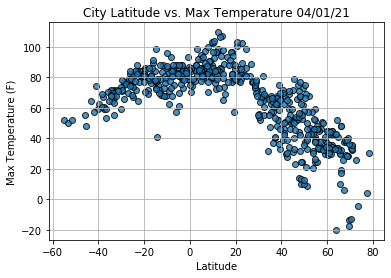

In [24]:
plt.scatter(lats,max_temps,edgecolor='k',linewidths=1,alpha=0.8,label="Cities",marker='o')
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show
plt.show()

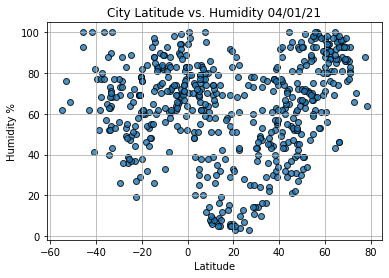

In [25]:
plt.scatter(lats,humidity,edgecolor='k',linewidths=1,alpha=0.8,label="Cities",marker='o')
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show
plt.show()

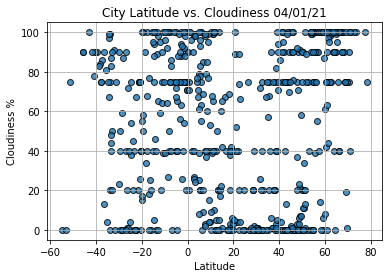

In [26]:
plt.scatter(lats,cloudiness,edgecolor='k',linewidths=1,alpha=0.8,label="Cities",marker='o')
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show
plt.show()

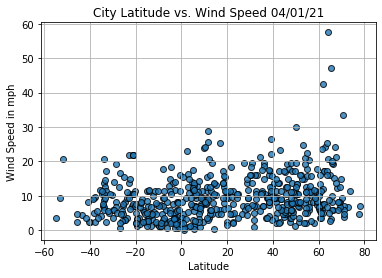

In [29]:
plt.scatter(lats,wind_speed,edgecolor='k',linewidths=1,alpha=0.8,label="Cities",marker='o')
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed in mph")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show
plt.show()

In [47]:
from scipy.stats import linregress


def plot_linregress(x_vals,y_vals,title,y_label,position:(int,int)):
    # get linear regression params
    m,b,r,p,err = linregress(x_vals,y_vals)
    
    # Calculate the values to plot the line
    lin_vals = [m*x_val+b for x_val in x_vals]
    # String representation of the line
    line_eq = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
    # plot the values and the line
    plt.scatter(x_vals,y_vals)
    plt.plot(x_vals,lin_vals,"r")
    # add other features to the chart
    plt.annotate(line_eq, position, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    return m,b,r,p,err

In [48]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

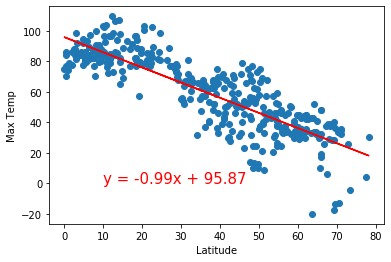

(-0.9935311629552556,
 95.87410463846838,
 -0.849063808836541,
 2.0792305722110415e-105,
 0.03200806281268977)

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linregress(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,0))

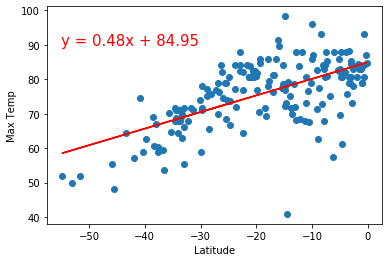

(0.48159138987055455,
 84.9466371733146,
 0.6305985874673552,
 1.1098181501509362e-21,
 0.04405642363255622)

In [53]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linregress(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-55,90))